In [ ]:
import numpy as np
import pandas as pd


In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print("这是一个pandas Series")
print(s)

这是一个pandas Series
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [ ]:
# 创建一个DataFrame
data = {
    "姓名": ["张三", "李四", "王五", "赵六"],
    "年龄": [28, 35, 22, 41],
    "城市": ["北京", "上海", "广州", "北京"],
    "薪资": [20000, 35000, 15000, 40000],
}

df = pd.DataFrame(data)

print("\n这是一个DataFrame:")
display(df)  # 在Jupyter中，display()比print()更美观地显示DataFrame


这是一个DataFrame:


,姓名,年龄,城市,薪资
0,张三,28,北京,20000
1,李四,35,上海,35000
2,王五,22,广州,15000
3,赵六,41,北京,40000


In [5]:
try:
    contracts_df = pd.read_csv("./data/contracts.csv")
    print("成果读取合同数据：")
    display(contracts_df)
except FileNotFoundError:
    print("错误：找不到 'data/contracts.csv' 文件。请确保你已经创建了它。")


成果读取合同数据：


,合同ID,合同类型,合同金额,签约方,签约城市,签约日期
0,C001,销售合同,50000,A公司,北京,2025-01-15
1,C002,服务合同,120000,B公司,上海,2025-02-20
2,C003,租赁合同,8000,个人,北京,2025-02-25
3,C004,销售合同,250000,C公司,深圳,2025-03-10
4,C005,服务合同,85000,NaN,上海,2025-04-05
5,C006,销售合同,30000,A公司,北京,2025-05-12


In [7]:
display(contracts_df.head(3))
display(contracts_df.tail(2))

,合同ID,合同类型,合同金额,签约方,签约城市,签约日期
0,C001,销售合同,50000,A公司,北京,2025-01-15
1,C002,服务合同,120000,B公司,上海,2025-02-20
2,C003,租赁合同,8000,个人,北京,2025-02-25


,合同ID,合同类型,合同金额,签约方,签约城市,签约日期
4,C005,服务合同,85000,NaN,上海,2025-04-05
5,C006,销售合同,30000,A公司,北京,2025-05-12


In [ ]:
contracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   合同ID    6 non-null      object
 1   合同类型    6 non-null      object
 2   合同金额    6 non-null      int64 
 3   签约方     5 non-null      object
 4   签约城市    6 non-null      object
 5   签约日期    6 non-null      object
dtypes: int64(1), object(5)
memory usage: 416.0+ bytes


In [19]:
display(contracts_df.describe())

,合同金额
count,6.000000
mean,90500.000000
std,87689.794161
min,8000.000000
25%,35000.000000
50%,67500.000000
75%,111250.000000
max,250000.000000


In [ ]:
# 选择'合同类型'这一列
contract_types = contracts_df["合同类型"]
print("选择'合同类型'列:")
print(contract_types)

选择'合同类型'列:
0    销售合同
1    服务合同
2    租赁合同
3    销售合同
4    服务合同
5    销售合同
Name: 合同类型, dtype: object


In [ ]:
# 选择'合同ID'和'合同金额'两列
# 注意这里用了两层方括号 [[]]
id_and_amount = contracts_df[["合同ID", "合同金额"]]
print("\n选择'合同ID'和'合同金额'列:")
display(id_and_amount)


选择'合同ID'和'合同金额'列:


,合同ID,合同金额
0,C001,50000
1,C002,120000
2,C003,8000
3,C004,250000
4,C005,85000
5,C006,30000


In [ ]:
# 使用 .loc 选择索引为 2 的行 (即第三行)
print("\n选择索引为2的行 (loc):")
display(contracts_df.loc[2])

# 使用 .iloc 选择第 4 行 (整数位置为3)
print("\n选择第4行 (iloc):")
display(contracts_df.iloc[3])

# 切片选择多行
print("\n选择从第2行到第4行 (iloc):")
display(contracts_df.iloc[1:4])  # 注意：不包括位置4


选择索引为2的行 (loc):


合同ID          C003
合同类型          租赁合同
合同金额          8000
签约方             个人
签约城市            北京
签约日期    2025-02-25
Name: 2, dtype: object


选择第4行 (iloc):


合同ID          C004
合同类型          销售合同
合同金额        250000
签约方            C公司
签约城市            深圳
签约日期    2025-03-10
Name: 3, dtype: object


选择从第2行到第4行 (iloc):


,合同ID,合同类型,合同金额,签约方,签约城市,签约日期
1,C002,服务合同,120000,B公司,上海,2025-02-20
2,C003,租赁合同,8000,个人,北京,2025-02-25
3,C004,销售合同,250000,C公司,深圳,2025-03-10


In [27]:
print("所有北京签约的合同：")
beijing_contracts = contracts_df[contracts_df["签约城市"] == "北京"]
display(beijing_contracts)

所有北京签约的合同：


,合同ID,合同类型,合同金额,签约方,签约城市,签约日期
0,C001,销售合同,50000,A公司,北京,2025-01-15
2,C003,租赁合同,8000,个人,北京,2025-02-25
5,C006,销售合同,30000,A公司,北京,2025-05-12


In [ ]:
# 找到所有合同金额大于10万的销售合同
print("\n金额大于10万的销售合同:")
high_value_sales = contracts_df[
    (contracts_df["合同金额"] > 10000) & (contracts_df["合同类型"] == "销售合同")
]
display(high_value_sales)


金额大于10万的销售合同:


,合同ID,合同类型,合同金额,签约方,签约城市,签约日期
0,C001,销售合同,50000,A公司,北京,2025-01-15
3,C004,销售合同,250000,C公司,深圳,2025-03-10
5,C006,销售合同,30000,A公司,北京,2025-05-12


In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print(s.value_counts())

0    2
1    0
2    1
3    0
4    0
5    2
6    0
7    4
8    1
9    6
dtype: int64
0    4
2    2
1    2
4    1
6    1
Name: count, dtype: int64


In [10]:
s = pd.Series(["Jack", "Tom", np.nan, "CABA", "dog", "cat"])
print(s.str.lower())

0    jack
1     tom
2     NaN
3    caba
4     dog
5     cat
dtype: object


In [ ]:
df = pd.DataFrame(np.random.randn(10, 6))
display(df)

,0,1,2,3,4,5
0,-0.209729,0.726388,-0.463708,0.725865,1.306056,-0.353695
1,1.075356,0.745622,0.534220,-1.607211,-0.811078,-0.313917
2,-1.019406,0.343483,-1.017701,0.380941,-1.209490,-1.620733
3,1.636875,0.382252,-0.025372,0.226144,0.099086,0.869535
4,0.741967,0.125766,-0.742086,0.599268,1.484169,0.629270
5,0.695500,1.395188,1.112661,0.682876,-0.552300,0.543051
6,-0.168458,0.867158,1.939012,0.073004,-1.500607,1.812874
7,-1.072720,-0.407810,-1.145099,-1.070832,2.222321,-0.083001
8,0.582643,1.517484,-0.176114,-0.921682,-2.521016,-0.354408
9,0.646461,-0.428822,-2.940019,-0.243323,-0.428070,-1.038322


In [20]:
pieces = [df[:3], df[3:7], df[7:]]
print(type(pieces))
print(pd.concat(pieces))

<class 'list'>
          0         1         2         3         4         5
0 -0.209729  0.726388 -0.463708  0.725865  1.306056 -0.353695
1  1.075356  0.745622  0.534220 -1.607211 -0.811078 -0.313917
2 -1.019406  0.343483 -1.017701  0.380941 -1.209490 -1.620733
3  1.636875  0.382252 -0.025372  0.226144  0.099086  0.869535
4  0.741967  0.125766 -0.742086  0.599268  1.484169  0.629270
5  0.695500  1.395188  1.112661  0.682876 -0.552300  0.543051
6 -0.168458  0.867158  1.939012  0.073004 -1.500607  1.812874
7 -1.072720 -0.407810 -1.145099 -1.070832  2.222321 -0.083001
8  0.582643  1.517484 -0.176114 -0.921682 -2.521016 -0.354408
9  0.646461 -0.428822 -2.940019 -0.243323 -0.428070 -1.038322


In [21]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
display(df)

,A,B,C,D
0,foo,one,-0.476269,-1.161962
1,bar,one,-0.762185,0.171053
2,foo,two,-0.469041,-0.873445
3,bar,three,1.269282,1.557145
4,foo,two,0.197810,0.120577
5,bar,two,-0.378341,-0.340156
6,foo,one,0.202776,-0.574050
7,foo,three,-0.102136,-1.940570


In [ ]:
df.groupby("A")[["C", "D"]].sum()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

display(df)

A         B
first second                    
bar   one    -0.238999  0.396445
      two     0.052988 -0.812965
baz   one    -0.772333  0.440264
      two     0.512268  0.208180
foo   one     0.266067 -0.280044
      two    -1.518756  0.299057
qux   one     0.038187 -0.310118
      two    -0.824601 -1.007564

In [26]:
df2 = df[:4]
display(df2)

A         B
first second                    
bar   one    -0.238999  0.396445
      two     0.052988 -0.812965
baz   one    -0.772333  0.440264
      two     0.512268  0.208180

In [28]:
stacked = df2.stack(future_stack=True)

display(stacked)

first  second   
bar    one     A   -0.238999
               B    0.396445
       two     A    0.052988
               B   -0.812965
baz    one     A   -0.772333
               B    0.440264
       two     A    0.512268
               B    0.208180
dtype: float64

In [33]:
display(stacked.unstack())
display(stacked.unstack(0))
display(stacked.unstack(1))
display(stacked.unstack(2))


A         B
first second                    
bar   one    -0.238999  0.396445
      two     0.052988 -0.812965
baz   one    -0.772333  0.440264
      two     0.512268  0.208180

first          bar       baz
second                      
one    A -0.238999 -0.772333
       B  0.396445  0.440264
two    A  0.052988  0.512268
       B -0.812965  0.208180

second        one       two
first                      
bar   A -0.238999  0.052988
      B  0.396445 -0.812965
baz   A -0.772333  0.512268
      B  0.440264  0.208180

A         B
first second                    
bar   one    -0.238999  0.396445
      two     0.052988 -0.812965
baz   one    -0.772333  0.440264
      two     0.512268  0.208180

In [34]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
display(df)

,A,B,C,D,E
0,one,A,foo,-1.248074,-1.435764
1,one,B,foo,-1.372095,-1.265118
2,two,C,foo,-0.113327,0.078359
3,three,A,bar,-0.767374,0.039409
4,one,B,bar,-0.581906,-0.466682
5,one,C,bar,-0.207085,-0.631280
6,two,A,foo,0.374081,-1.331685
7,three,B,foo,1.155848,0.232101
8,one,C,foo,-0.327052,0.835632
9,one,A,bar,0.531922,0.783407


In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns="C", aggfunc="mean")

C             bar       foo
A     B                    
one   A  0.531922 -1.248074
      B -0.581906 -1.372095
      C -0.207085 -0.327052
three A -0.767374       NaN
      B       NaN  1.155848
      C  0.318412       NaN
two   A       NaN  0.374081
      B -0.669801       NaN
      C       NaN -0.113327

In [39]:
import pandas as pd

# 创建日期范围
dates = pd.date_range("2024-01-01", periods=6, freq="D")
print(dates)

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06'],
              dtype='datetime64[ns]', freq='D')


In [40]:
df = pd.DataFrame({"value": range(6)}, index=dates)
print(df)

            value
2024-01-01      0
2024-01-02      1
2024-01-03      2
2024-01-04      3
2024-01-05      4
2024-01-06      5


In [41]:
# 按月重采样并求和
monthly = df.resample("M").sum()
print(monthly)

            value
2024-01-31     15


/var/folders/zy/jm0qm3k11vxcrgh8t976lhp00000gn/T/ipykernel_3139/2769101207.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").sum()


In [42]:
# 计算3天滑动平均
df["rolling_mean"] = df["value"].rolling(window=3).mean()
print(df)

            value  rolling_mean
2024-01-01      0           NaN
2024-01-02      1           NaN
2024-01-03      2           1.0
2024-01-04      3           2.0
2024-01-05      4           3.0
2024-01-06      5           4.0


In [43]:
# 向后移动一行
df["lag1"] = df["value"].shift(1)
print(df)

            value  rolling_mean  lag1
2024-01-01      0           NaN   NaN
2024-01-02      1           NaN   0.0
2024-01-03      2           1.0   1.0
2024-01-04      3           2.0   2.0
2024-01-05      4           3.0   3.0
2024-01-06      5           4.0   4.0


In [48]:
# 选取2024年1月2日及之后的数据
print(df["2024-01-02":])

            value  rolling_mean  lag1
2024-01-02      1           NaN   0.0
2024-01-03      2           1.0   1.0
2024-01-04      3           2.0   2.0
2024-01-05      4           3.0   3.0
2024-01-06      5           4.0   4.0


In [49]:
import pandas as pd

# 通过 pd.Categorical 创建
s = pd.Series(["a", "b", "a", "c", "b", "a"])
cat = s.astype("category")
print(cat)

0    a
1    b
2    a
3    c
4    b
5    a
dtype: category
Categories (3, object): ['a', 'b', 'c']


In [ ]:
cat = pd.Categorical(
    ["low", "medium", "high", "medium"],
    categories=["low", "medium", "high"],
    ordered=True,
)
print(cat)

['low', 'medium', 'high', 'medium']
Categories (3, object): ['low' < 'medium' < 'high']


In [51]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [52]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [54]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [55]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [56]:
import pandas as pd

s = pd.Series(["a", "b", "a", "c"])
cat = s.astype("category")
# 原有类别：['a', 'b', 'c']

# 重新设置类别
cat = cat.cat.set_categories(["a", "b", "c", "d"])
print(cat)

0    a
1    b
2    a
3    c
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']


In [62]:
import matplotlib.pyplot as plt

plt.close("all")

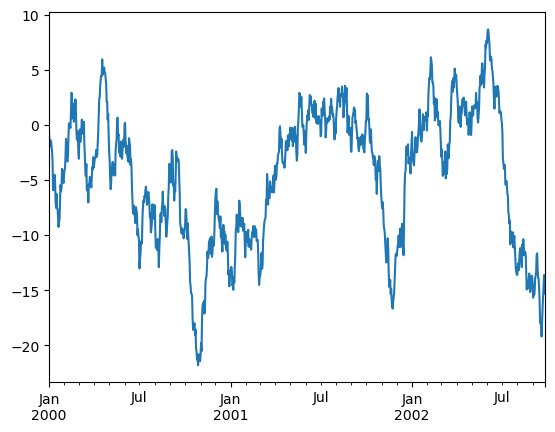

In [58]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

ts.plot();

<Figure size 640x480 with 0 Axes>

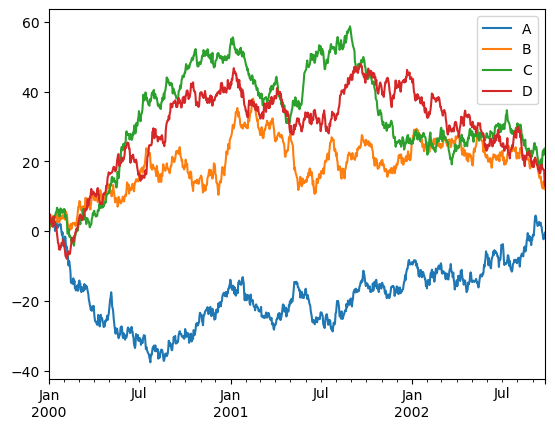

In [61]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc="best")